In [1]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [32]:
def getFiles(basePath):
    files =  glob(basePath);
    files.sort();
    return files;

In [33]:
def getFilesNew(basePath):
    dirs = glob(basePath+"/*/")
    #print(dirs)
    for _dir in dirs:
        files = glob(_dir+"*B?*.tiff")
        #print(files)
        yield files

In [34]:
# S_sentinel_bands_forest_new = getFilesNew("/tmp/shared/sentianel2dataset3/water")
# list(S_sentinel_bands_forest_new)

In [35]:
S_sentinel_bands_forest = list(getFilesNew("/tmp/shared/sentianel2dataset3/forest"))
S_sentinel_bands_forest

[['/tmp/shared/sentianel2dataset3/forest/1/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/forest/1/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/forest/1/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B8A_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/forest/1/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/forest/1/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/forest/1/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/forest/1/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/forest/1/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/forest/1/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
  '/tmp/shared/sent

In [36]:
S_sentinel_bands_town = list(getFilesNew("/tmp/shared/sentianel2dataset3/town"))
S_sentinel_bands_town

[['/tmp/shared/sentianel2dataset3/town/1/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/town/1/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/town/1/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/town/1/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/town/1/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/town/1/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/town/1/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/town/1/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/town/1/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_B8A_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/tow

In [37]:
S_sentinel_bands_water = list(getFilesNew("/tmp/shared/sentianel2dataset3/water"))
S_sentinel_bands_water

[['/tmp/shared/sentianel2dataset3/water/1/2022-08-30-00_00_2022-08-30-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/water/1/2022-08-30-00_00_2022-08-30-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/water/1/2022-08-30-00_00_2022-08-30-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/water/1/2022-08-30-00_00_2022-08-30-23_59_Sentinel-2_L2A_B8A_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/water/1/2022-08-30-00_00_2022-08-30-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/water/1/2022-08-30-00_00_2022-08-30-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/water/1/2022-08-30-00_00_2022-08-30-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/water/1/2022-08-30-00_00_2022-08-30-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/water/1/2022-08-30-00_00_2022-08-30-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
  '/tmp/shared/sentianel2dat

In [38]:
S_sentinel_bands_sands = list(getFilesNew("/tmp/shared/sentianel2dataset3/sands"))
S_sentinel_bands_sands

[['/tmp/shared/sentianel2dataset3/sands/1/2022-08-29-00_00_2022-08-29-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/sands/1/2022-08-29-00_00_2022-08-29-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/sands/1/2022-08-29-00_00_2022-08-29-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/sands/1/2022-08-29-00_00_2022-08-29-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/sands/1/2022-08-29-00_00_2022-08-29-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/sands/1/2022-08-29-00_00_2022-08-29-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/sands/1/2022-08-29-00_00_2022-08-29-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/sands/1/2022-08-29-00_00_2022-08-29-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/sands/1/2022-08-29-00_00_2022-08-29-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
  '/tmp/shared/sentianel2dat

In [39]:
S_sentinel_bands_field = list(getFilesNew("/tmp/shared/sentianel2dataset3/field"))
S_sentinel_bands_field

[['/tmp/shared/sentianel2dataset3/field/1/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/field/1/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/field/1/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/field/1/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/field/1/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/field/1/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/field/1/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/field/1/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B8A_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/field/1/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
  '/tmp/shared/sentianel2dat

In [40]:
def getFilesArray(paths):
    l = []
    for i in paths:
        with rio.open(i, 'r') as f:
            l.append(f.read(1))
    arr_st = np.stack(l)
    return arr_st;

In [41]:
def getFilesArrayNew(paths):
    l = []
    for i in paths:
        s = []
        for j in i:
            with rio.open(j, 'r') as f:
                s.append(f.read(1))
        l.append(s)
    arr_st_new = np.stack(l)
    return  arr_st_new

In [42]:
forest_st = getFilesArrayNew(S_sentinel_bands_forest);

In [43]:
town_st = getFilesArrayNew(S_sentinel_bands_town);

In [44]:
sands_st = getFilesArrayNew(S_sentinel_bands_sands);

In [45]:
water_st = getFilesArrayNew(S_sentinel_bands_water);

In [46]:
field_st = getFilesArrayNew(S_sentinel_bands_field);

In [185]:
# images = field_st.shape[0]
# height = field_st.shape[3]
# spape = field_st.shape
#
# field_st1 = np.reshape(field_st, (spape[1],spape[2], spape[3]*spape[0]))
# field_st1.shape

In [47]:
def reshapeImages(images):
    shape = images.shape
    return  np.reshape(images, (shape[1],shape[2],shape[3]*shape[0]))

In [48]:
forest_st = reshapeImages(forest_st)

#
#
#

In [49]:
town_st = reshapeImages(town_st)

In [50]:
water_st = reshapeImages(water_st)

In [51]:
sands_st = reshapeImages(sands_st)

In [52]:
field_st = reshapeImages(field_st)

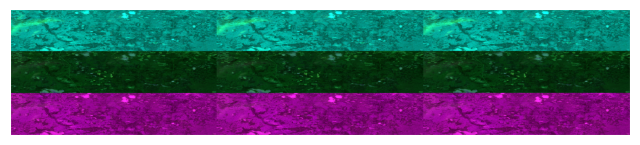

<AxesSubplot:>

In [53]:
ep.plot_rgb(
    forest_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
)

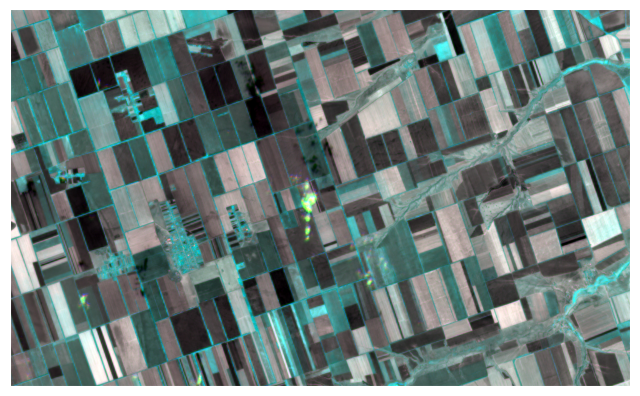

<AxesSubplot:>

In [54]:
ep.plot_rgb(
    field_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
)

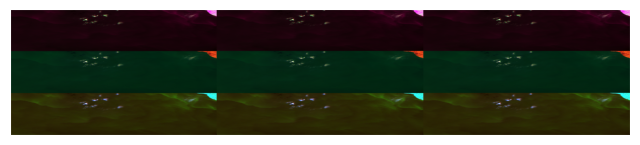

<AxesSubplot:>

In [55]:
ep.plot_rgb(
    water_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
)

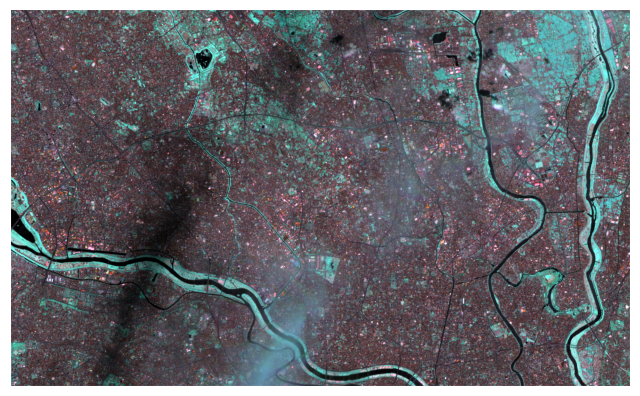

<AxesSubplot:>

In [56]:
ep.plot_rgb(
    town_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
)

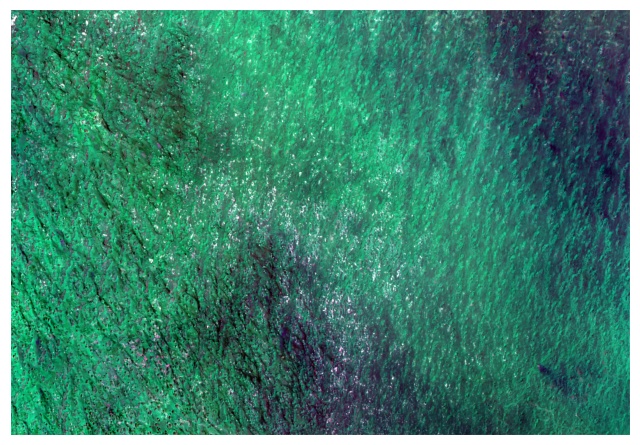

<AxesSubplot:>

In [57]:
ep.plot_rgb(
    sands_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
)

In [58]:
x_forest = np.moveaxis(forest_st, 0, -1);
x_forest.shape

(760, 3750, 12)

In [59]:
x_sands = np.moveaxis(sands_st, 0, -1);
x_sands.shape

(858, 1250, 12)

In [60]:
x_town = np.moveaxis(town_st, 0, -1);
x_town.shape

(760, 1250, 12)

In [61]:
x_water = np.moveaxis(water_st, 0, -1);
x_water.shape

(760, 3750, 12)

In [62]:
x_field = np.moveaxis(field_st, 0, -1);
x_field.shape

(760, 1250, 12)

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [64]:
def createVector(arr):
    arr1 = arr.reshape(-1, 12)
    #scaler = StandardScaler().fit(arr1)
    #
    #X_scaled = scaler.transform(arr1)
    return arr1

In [65]:
forest_data = createVector(x_forest)
town_data = createVector(x_town)
sands_data = createVector(x_sands)
water_data = createVector(x_water)
field_data = createVector(x_field);

In [205]:
np.max(forest_data)

0.5586

In [66]:
p = np.append(forest_data, town_data, axis=0)
p = np.append(p, sands_data, axis=0)
p = np.append(p, water_data, axis=0)
p = np.append(p, field_data, axis=0)

In [67]:
scaler = StandardScaler().fit(p)
p_scaled = scaler.transform(p)
p_scaled.shape

(8672500, 12)

In [68]:
y_data_forest = np.full(forest_data.shape[0],1)
y_data_town = np.full(town_data.shape[0],2)
y_data_sands = np.full(sands_data.shape[0],3)
y_data_water = np.full(water_data.shape[0],4)
y_data_field = np.full(field_data.shape[0],5)

In [69]:
y_data = np.append(y_data_forest, y_data_town)
y_data = np.append(y_data, y_data_sands)
y_data = np.append(y_data, y_data_water)
y_data = np.append(y_data, y_data_field)
y_data.shape

(8672500,)

In [70]:
from sklearnex import patch_sklearn, config_context, set_config

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [211]:
#set_config(target_offload="cpu:0")

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(p_scaled, y_data, test_size=0.1, stratify=y_data)


In [213]:
print(f'X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train Shape: {y_train.shape}\ny_test Shape:{y_test.shape}')

X_train Shape: (8660250, 12)
X_test Shape: (962250, 12)
y_train Shape: (8660250,)
y_test Shape:(962250,)


## K-Nearest Neighbor Classifier (K-NNC)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

In [73]:
print(f"Accuracy: {accuracy_score(y_test, knn_pred)*100}")

Accuracy: 100.0


In [74]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    285000
           2       1.00      1.00      1.00     95000
           3       1.00      1.00      1.00    107250
           4       1.00      1.00      1.00    285000
           5       1.00      1.00      1.00     95000

    accuracy                           1.00    867250
   macro avg       1.00      1.00      1.00    867250
weighted avg       1.00      1.00      1.00    867250



In [75]:
import pickle

knnModelFile = "/tmp/shared/knnc_v3_1.sav"

pickle.dump(knn, open(knnModelFile, 'wb'))

In [75]:
town_predict = knn.predict(town_data).reshape((760, 1250))

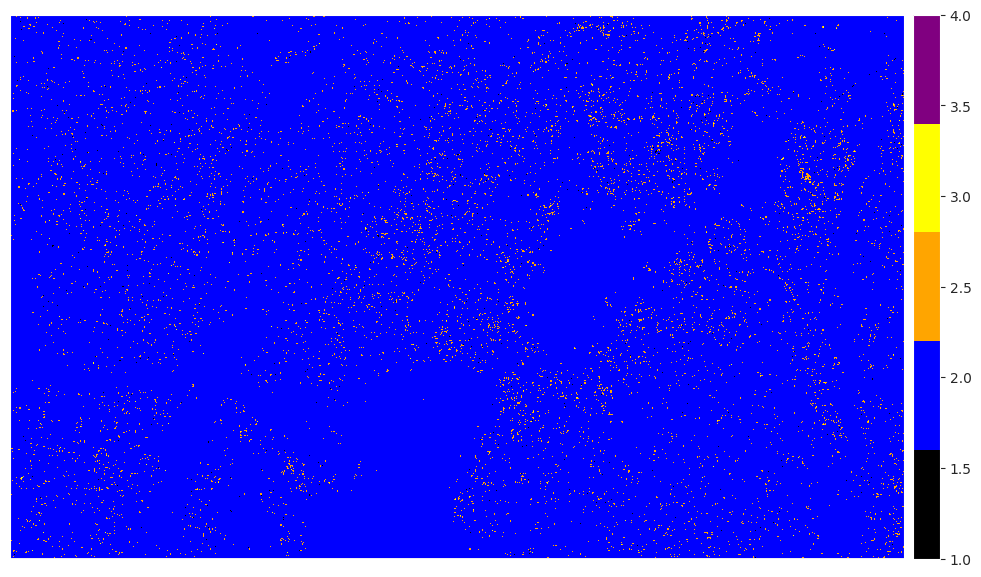

In [45]:
ep.plot_bands(town_predict,
              cmap=ListedColormap(['black', 'blue', 'orange', 'yellow', 'purple']))
plt.show()

In [39]:
forest_predict = knn.predict(forest_data).reshape((784, 1250))

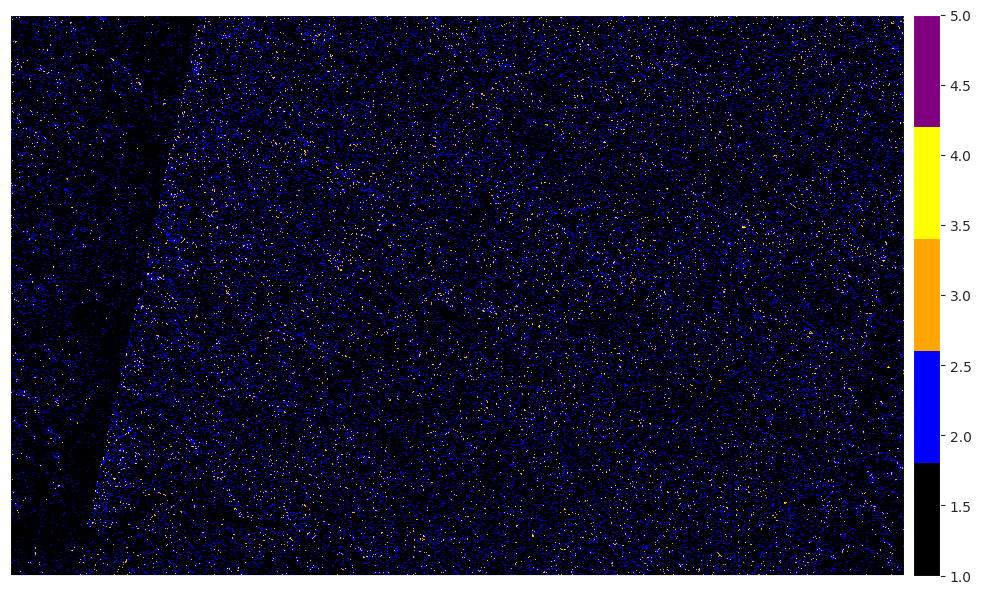

In [40]:
ep.plot_bands(forest_predict,
              cmap=ListedColormap(['black', 'blue', 'orange', 'yellow', 'purple']))
plt.show()

In [41]:
## Support Vector Machine (SVM)

In [ ]:
# from sklearn.svm import SVC
# svm = SVC(C=2.0, kernel='rbf', degree=2, cache_size=8196)
# svm.fit(X_train, y_train)

## GBM

In [73]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label=y_train)

params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=15
params['num_class']=6 #no.of unique values in the target class not inclusive of the end value

clf = lgb.train(params, d_train, 100)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.168736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 5289949, number of used features: 12
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -1.858635
[LightGBM] [Info] Start training from score -1.822462
[LightGBM] [Info] Start training from score -1.701177
[LightGBM] [Info] Start training from score -0.723851
[LightGBM] [Info] Start training from score -4.190600


In [74]:
lgb_predictions = clf.predict(X_test)

In [75]:
lgb_pred = np.argmax(lgb_predictions, axis=1)
lgb_pred.shape

(587773,)

In [76]:
print(f"Accuracy: {accuracy_score(y_test, lgb_pred)*100}")

Accuracy: 97.2652707763031


## check existing

In [76]:
from glob import glob
S_sentinel_bands = glob("/tmp/shared/test_images2/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

['/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-

In [77]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

In [78]:
arr_st = np.stack(l)

In [79]:
print(f'Height: {arr_st.shape[1]}\nWidth: {arr_st.shape[2]}\nBands: {arr_st.shape[0]}')

Height: 733
Width: 1250
Bands: 12


In [80]:
x = np.moveaxis(arr_st, 0, -1)
x.shape

(733, 1250, 12)

In [81]:
from sklearn.preprocessing import StandardScaler

X_data = x.reshape(-1, 12)

scaler = StandardScaler().fit(X_data)

X_scaled = scaler.transform(X_data)

X_scaled.shape

(916250, 12)

In [82]:
y_data_test = loadmat('/tmp/shared/test_images2/labeling.mat')['data']
y_data_test.shape

(733, 1250)

In [83]:
knn_predict1 = knn.predict(X_scaled)
knn_image_default1 = knn_predict1.reshape((733, 1250))

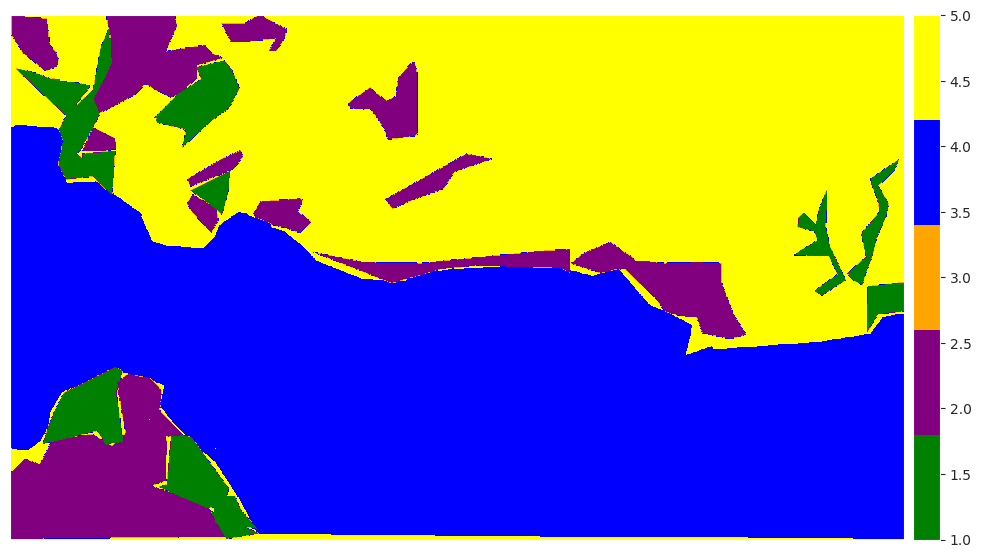

<AxesSubplot:>

In [84]:
ep.plot_bands(y_data_test,
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))

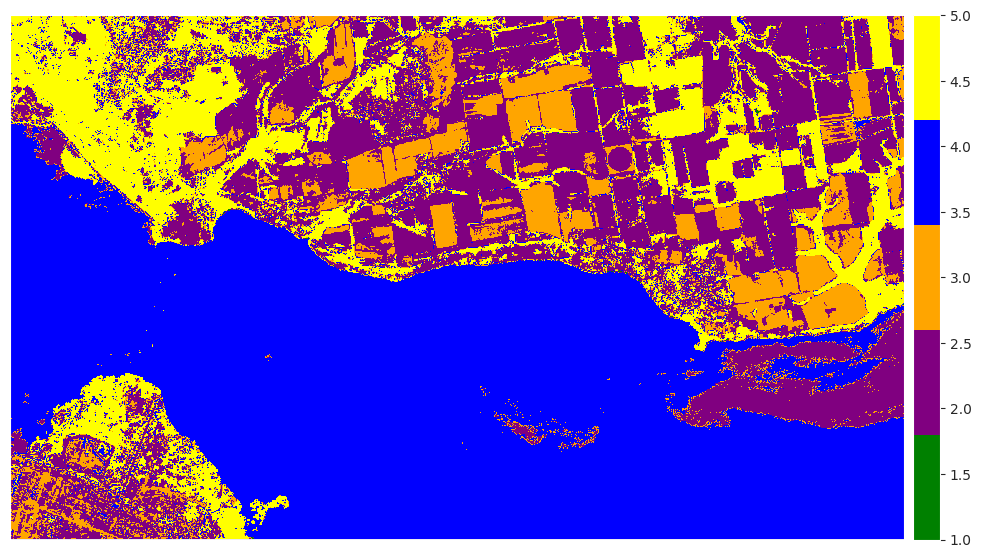

<AxesSubplot:>

In [85]:
ep.plot_bands(knn_image_default1,
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))

In [86]:
print(f"Accuracy: {accuracy_score(knn_predict1, y_data_test.ravel())*100}")
#knn_predict1[-1]
#y_data_test[-1][-1]

Accuracy: 58.15792633015007


In [87]:
print(classification_report(y_data_test.ravel(), knn_predict1))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.14      0.00      0.01     40622
           2       0.17      0.53      0.26     88062
           3       0.00      0.00      0.00         0
           4       0.96      0.93      0.94    415326
           5       0.62      0.27      0.38    372240

    accuracy                           0.58    916250
   macro avg       0.38      0.35      0.32    916250
weighted avg       0.71      0.58      0.61    916250



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
knn_proba = knn.predict_proba(X_scaled)

In [89]:
knn_proba1 = knn_proba[: , 0]
knn_proba2 = knn_proba[: , 1]
knn_proba3 = knn_proba[: , 2]
knn_proba4 = knn_proba[: , 3]
knn_proba5 = knn_proba[: , 4]

Text(0.5, 1.0, 'Field')

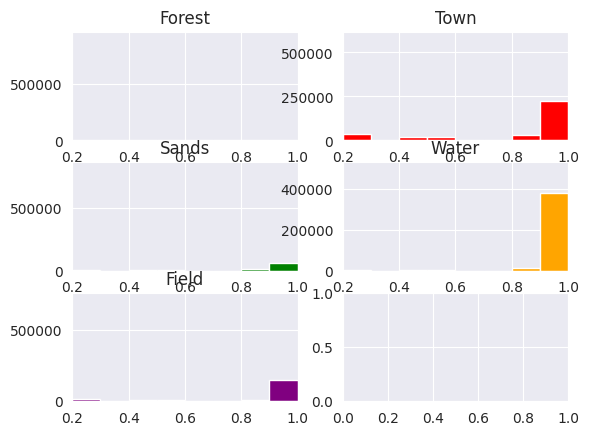

In [90]:
import matplotlib.pyplot as mplt
# mplt.hist(knn_proba4)
fig, axs = mplt.subplots(3, 2)
axs[0,0].hist(knn_proba1)
axs[0,0].set_xlim([0.2,1])
axs[0,0].set_title("Forest")
axs[0,1].hist(knn_proba2, color="red")
axs[0,1].set_xlim([0.2,1])
axs[0,1].set_title("Town")
axs[1,0].hist(knn_proba3, color="green")
axs[1,0].set_xlim([0.2,1])
axs[1,0].set_title("Sands")
axs[1,1].hist(knn_proba4, color="orange")
axs[1,1].set_xlim([0.2,1])
axs[1,1].set_title("Water")
axs[2,0].hist(knn_proba5, color="purple")
axs[2,0].set_xlim([0.2,1])
axs[2,0].set_title("Field")

In [104]:
pred2 = clf.predict(X_scaled)

In [107]:
lgb_pred_test = np.argmax(pred2, axis=1)

In [108]:
print(classification_report(y_data_test.ravel(), lgb_pred_test))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.11      0.87      0.20     40622
           2       0.08      0.01      0.02     88062
           3       0.00      0.00      0.00         0
           4       0.21      0.00      0.00    415326
           5       0.00      0.00      0.00    372240

    accuracy                           0.04    916250
   macro avg       0.08      0.18      0.04    916250
weighted avg       0.11      0.04      0.01    916250



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1